In [5]:
# for development, this automatically updates behavior when libraries are modified

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%reset

In [3]:
import numpy as np
from matplotlib import pyplot as plt



In [ ]:
# output customization 

np.set_printoptions(threshold=40)  #truncate arrays longer than 40

import warnings  #suppress annoying warnings from numpy etc.
warnings.filterwarnings('ignore')

# Basic Tutorial

This tutorial introduces the basic philosophy of the `pyXsurf` library, trying to provide a general view, and it is suitable also to user not familiar to Python.

<!---
More advanced users, who prefer a faster dive into the library can consult the quickstart page (coming soon!).
-->

## Introduction to the library

The exemplar class, `Data2D` represents 2D data linked to `x` and `y` coordinates. 

> note: Since the interface is quite similar, we will start demonstrating the library function using the `Data2D` class. Other classes and functions are included in the library and will be described in other docuemnts. For example, an aggregated data `Dlist` (for advanced users) is also available to manage multiple images at once. Also, the object interface of `Data2D` is built on top of a function library in module `pySurf.data2D`: for almnost each method there is a corresponding function that can be called with something like `pySurf.data2D.function(data, x, y, ..)`. The use of the class interface is strongly suggested, as it implements a good number of additional capabilities (e.g. units of measurements or algebraic operations).
Similarly, routines operating on profiles (y as a function of x as couples of vector x and y), are contained in class `pyProfile.Profile` and `pyProfile.profile` which have in many points interfaces similar to modules in `pySurf`. 


You can import it like any other Python object, and it has all of Python's features, for example, I can inspect its objects (or methods, or functions) using `?`

In [6]:
from pySurf.data2D_class import Data2D

Data2D?


<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject


Init signature:
Data2D(
    data=None,
    x=None,
    y=None,
    file=None,
    reader=None,
    units=None,
    name=None,
    *args,
    **kwargs,
)
Docstring:     
A class containing 2D data with x and y coordinates and methods for analysis.
    
Init docstring:
Can be initialized with data | data, x, y | file | file, x, y.
if x and y are coordinates if match number of elements, 
    or used as range if two element. 
If provided together with file, they override x and y 
    read from file.

Function methods return a copy with new values and don't alter original
   object. Reassign to variable to use as modifier:
   e.g. a=a.level( ... )

Args:
    data (2D array or string): 2D data or file name (suitable reader must 
    provided).
    
    x, y (array): coordinates or ranges.
    
    file (str): alternative way to provide a data file.
    
    units (str array): 3-element array with units symbols for `x`, `y`, `data`  
    
    reader (function): reader function (see `pySurf.re

A set of methods is available with the class interface. 

Here I use again some Python introspection to format and print a list of all methods:

In [7]:
# all internals starting by double underscores are considered methods, print them on separate lines

print('methods:\n\n','\n'.join([d for d in dir(Data2D) if d[:2] != '__']))

methods:

 add_markers
align_interactive
apply_to_data
apply_transform
copy
crop
extract_profile
histostats
level
load
merge
plot
printstats
projection
psd
remove_nan_frame
remove_outliers
resample
rot90
rotate
save
shift
slope
stats
std
topoints
transpose
tv
update_wrapper


In the most basic use, `Data2D` can be initialized by providing a matrix of 2-dimensional data and (optionally) `x` and `y` coordinates. `Data2D` objects can be also initialized from many common formats using a reader function. See [related tutorial](./basic_usage.ipynb) for details on format reading and initialization options.

We will then call the `.plot()` method (note that information provided at initialization, like units of measure are included in the plot, together with a set of common or custom stats):

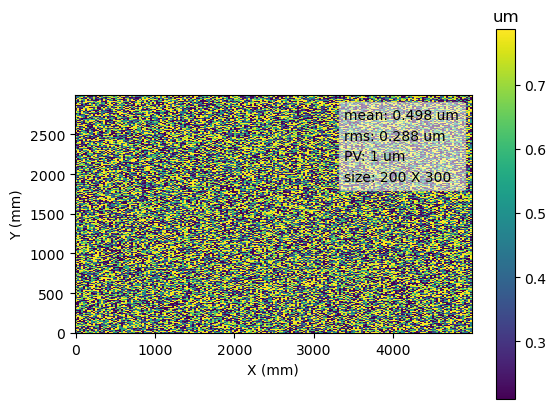

In [8]:
# create a 200 x 300 random data surface, with steps or 25 and 10 for x and y respectively.
nx = 200
ny = 300
data = np.random.random(nx*ny).reshape(ny,nx)
x = np.arange(nx)*25
y = np.arange(ny)*10

# crete and plot object, providing optional units
D = Data2D(data,x,y,units=['mm','mm','um'])
ax = D.plot()

You can retrieve data and coordinates at any moment (e.g. if you want to interface `pyXsurf` with your own code) by simply calling the object, and get `data`, `x` and `y` as `np.arrays`:

In [9]:
dd, xx, yy = D()

In [10]:
print(dd.shape,xx.shape,yy.shape)

(300, 200) (200,) (300,)


It is also easy to convert the surface data to x,y,z points:

In [12]:
D.topoints()

array([[0.00000000e+00, 0.00000000e+00, 2.84305104e-01],
       [2.50000000e+01, 0.00000000e+00, 4.49650311e-01],
       [5.00000000e+01, 0.00000000e+00, 6.45420624e-01],
       ...,
       [4.92500000e+03, 2.99000000e+03, 3.63053860e-01],
       [4.95000000e+03, 2.99000000e+03, 4.93782208e-01],
       [4.97500000e+03, 2.99000000e+03, 4.22585074e-01]])

Functions (these are implemented as functions only, not as classes) to manipulate data points in 3-coordinate format are available in module `points`.

## Methods and Operations

A general principle followed through the library for all methods and functions overlapping standard Python or libraries is to maintain the syntax as close as possible to the original, so that the library usage can be more familiar to users who already know Python.

For example the `plot` method is built on top of the standard Python function `matplotlib.pyplot.plot` (aka `plt.plot`) and accept all its methods.

I can also use all standard `matplotlib` syntax to modify plots after creation (e.g. change title or labels), save the figure, or change palette.



Text(0.5, 1.0, 'surface of data')

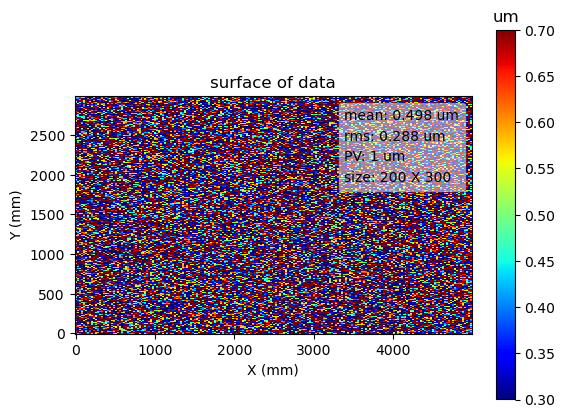

In [13]:
D.plot(vmin=0.3,vmax=0.7,cmap=plt.get_cmap('jet'))
plt.title('surface of data')

Another principle is that all methods always (or at least when it makes sense) return a copy of the data object, so this is not modified.

This also allows chaining different operations:

<Axes: title={'center': 'unchanged'}, xlabel='X (mm)', ylabel='Y (mm)'>

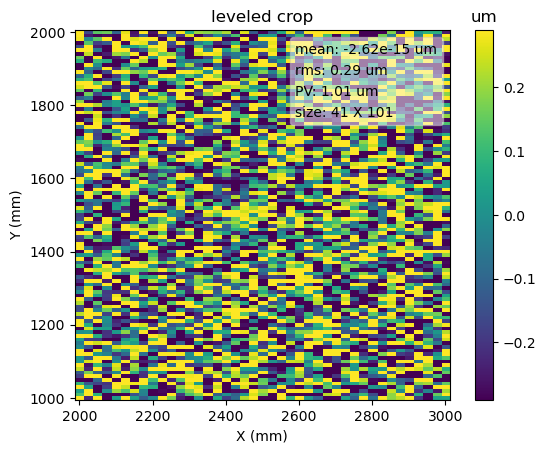

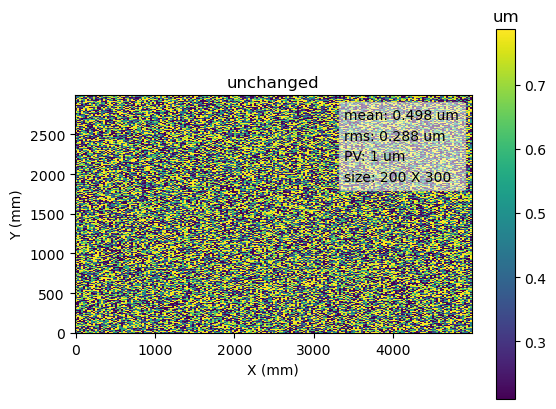

In [14]:
# this is a perfectly legal operation 
D.crop([2000,3000],[1000,2000]).level().plot(title = 'leveled crop')

# but remember to reassign it if you want to modify the data:

plt.figure()
D.crop([2000,3000],[1000,2000]).level()
D.plot(title='unchanged')   #unchanged, you forgot to reassign, e.g.: D = D.crop(....) 

Note also that algebraic operations are performed in a very natural way by means of normal algebraic syntax (the library takes care of resampling and invalid values):

<Axes: title={'center': 'Difference with transposed'}, xlabel='X (mm)', ylabel='Y (mm)'>

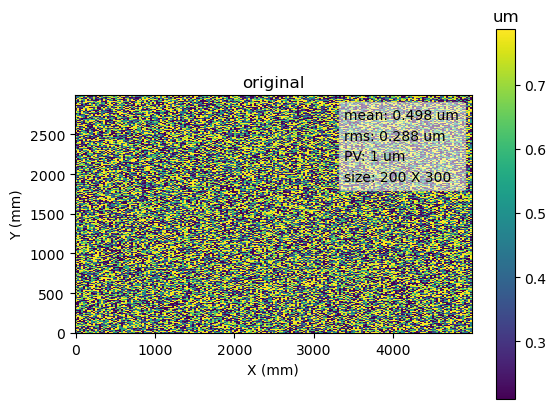

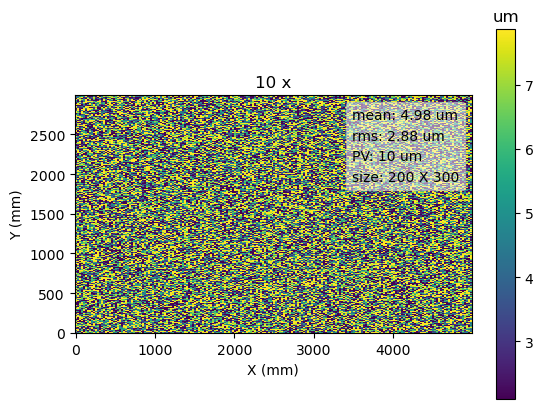

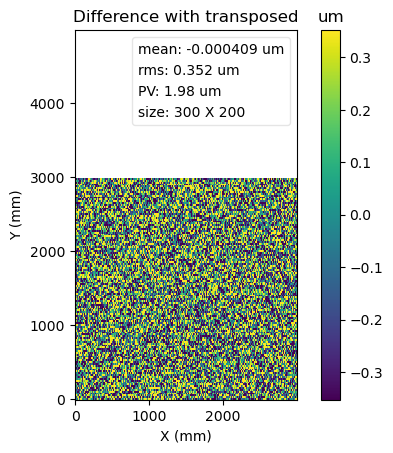

In [15]:
D.plot(title='original') 

plt.figure()
(D*10).plot(title = '10 x')

plt.figure()
(D.transpose()-D).plot(title = 'Difference with transposed')

## Advanced Analysis

first argument is string, use it as filename
fileformat ``.txt``not recognized for file ..\..\..\source\pySurf\test\input_data\MFT-txt\EN4-2-100.txt
Use generic text reader
Return object <.Data2D "EN4-2-100.txt" at 0x262b92d0c40>


<Axes: title={'center': 'EN4-2-100.txt'}, xlabel='X (mm)', ylabel='Y (mm)'>

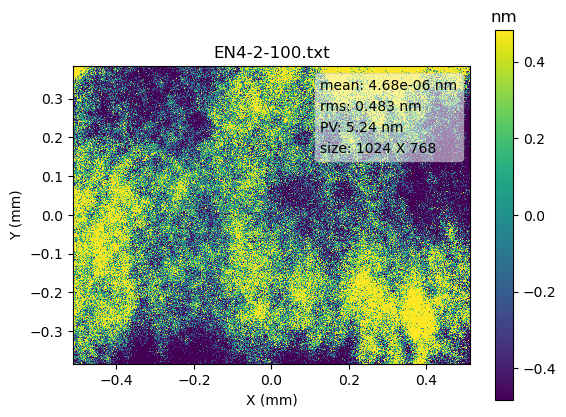

In [16]:
fn2 = r'..\..\..\source\pySurf\test\input_data\MFT-txt\EN4-2-100.txt'

#d = Data2D(fn2) 
d = Data2D(fn2,units=['mm','mm','nm'],center=(0,0),matrix=1,delimiter='',scale=(0.001,0.001,635.)) #this matches exactly MFT software

print ("Return object", d)

d.plot()

Some simple example (work in progress more details will be added).

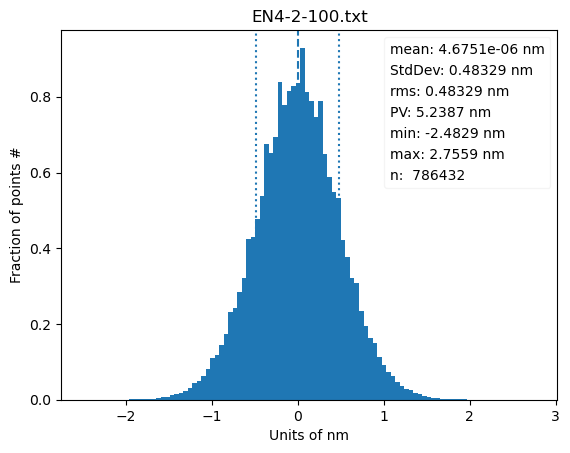

In [25]:
h1 = d.histostats()

Some manipulation:

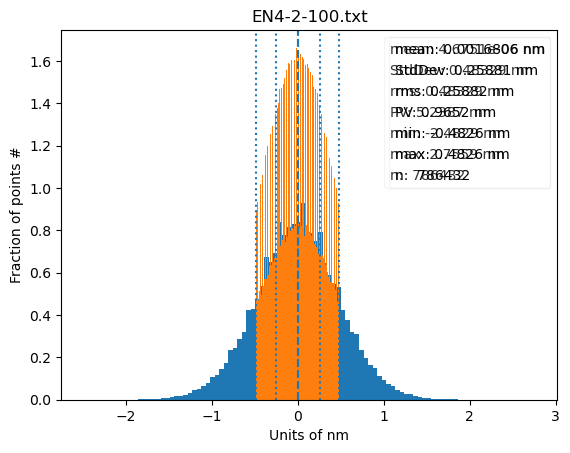

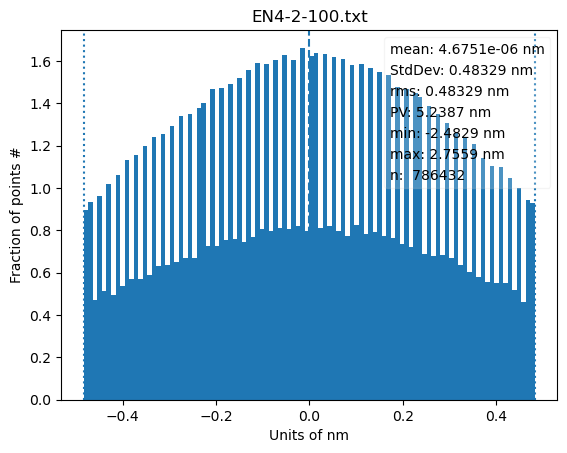

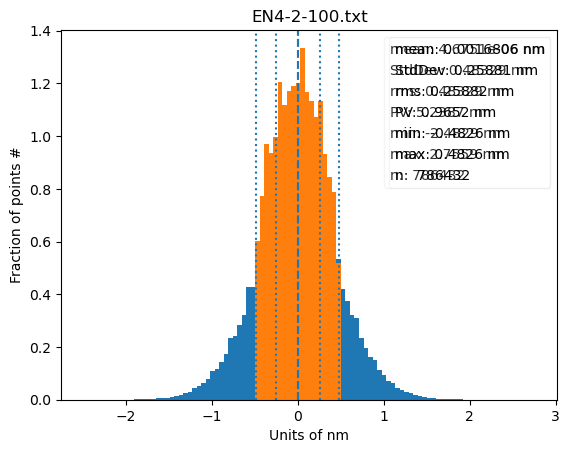

In [30]:
h1 = d.histostats()
h2 = d.remove_outliers(nsigma=1).histostats()  #i picchi vengono fuori dal non aver lasciato gli stessi bin di prima, ma perche'?
plt.figure()
d.histostats(bins=h2[1]) #ci sarebbero anche su h1 se plottato con stessi bins

plt.figure()
h1 = d.histostats()
h2 = d.remove_outliers(nsigma=1).histostats(bins=h1[1])  #i picchi vengono fuori dal non aver lasciato gli stessi bin di prima, ma perche'?


<Axes: title={'center': 'EN4-2-100.txt'}, xlabel='X (mm)', ylabel='Y (mm)'>

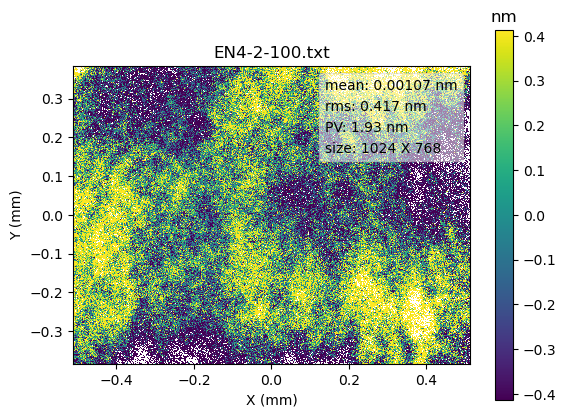

In [32]:
dd = d.remove_outliers(nsigma=2)
dd.plot()

## PSD Analysis


To show some complex analysis:

d.psd?

    Signature:
    Data2D.psd(
        self,
        wfun=None,
        rmsnorm=True,
        norm=1,
        analysis=False,
        subfix='',
        name=None,
        *args,
        **kwargs,
    )
    Docstring:
    return a PSD2D object with 2D psd of self.
            If analysis is set True, `psd2d_analysis` function is called to generate plots.
            Parameters proper of this function are passed as args.
            You need to pass also title, it generates output,
            this is subject to change, at the moment, pass empty string to generate plots
            or string to create output graphics.
            subfix and name are used to control the name of returned object.
            units are set in units of self because of the ambiguity mentioned in
            pySurf.psd2d.psd_units, and consistently with functions in `pySurf.psd2d`.


    psd2d(data, x, y, wfun=None, norm=1, rmsnorm=False, axis=1, includezerofreq=False)
    Calculate the 2d psd by lines along axis. return freq and psd.

            doesnt work with nan.
            use 2d function for psd np.fft.rfft2 for efficiency and mimics
                what done in pySurf.psd.psd

<Figure size 640x480 with 0 Axes>

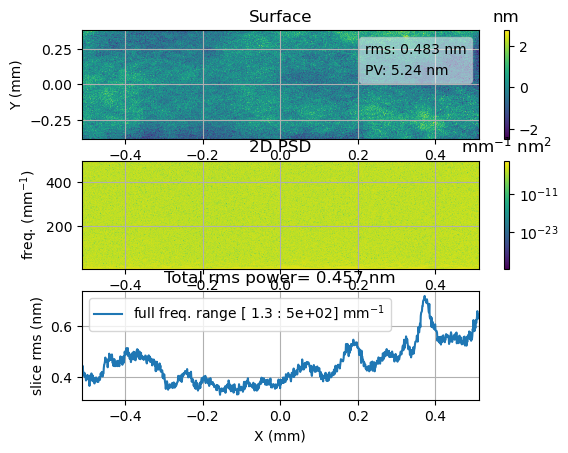

In [34]:
d.psd(analysis=True,title='')
plt.show()

The top panel is just a reference to the original data. The center panel represent PSD calculated by line for each column in data, while the bottom panel is the rms as integral of each PSD column.

Note that units for PSDs are automatically calculated from `Data2D` units.

Note that here the color range is not optimal and can be adjusted with parameter `prange`.

<Figure size 640x480 with 0 Axes>

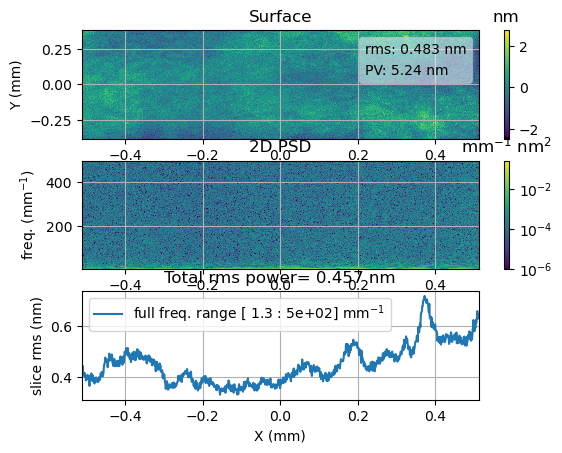

In [48]:
d.psd(analysis=True,title='',prange=[1e-6,None])
plt.show()

Other aspects can be tuned, e.g. a threshold can be imposed on rms for inclusion or the contribution to rms in different frequency ranges can be visualized (see documentation for more):

<Figure size 640x480 with 0 Axes>

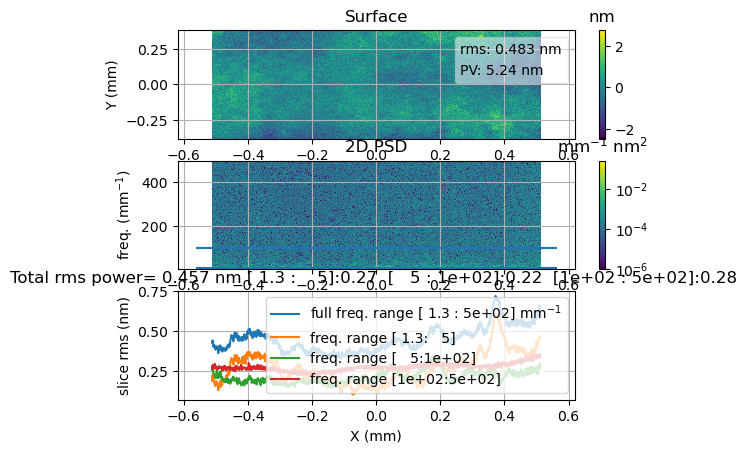

In [49]:
d.psd(analysis=True,title='',prange=[1e-6,None],rmsrange=[[None,5],[5,100],[100,None]])
plt.show()


Note that the PSD object returned by PSD function is just a regular `Data2D` object (a kind of it, it has e.g. a different plotting behaviours, keeping into account log axis). It easy to obtain average or range PSD (TBD). 

Notare valori rms per banda sopra grafico.

TODO: position of input data files. Search for more meaningful examples.
TODO: run again with updated routines to remedy to image misalignment.
TODO: repeat analysis with a more representative sample.
TODO: Mostra come i valori ritornati sono psd che possono essere plottate sullo stesso grafico.
TODO: Mostra opzioni proiezione psd.
